In [0]:
!pip install xgboost

In [0]:
import pandas as pd
import numpy as np
import string

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import TfidfVectorizer



#from catboost import CatBoostClassifier

import os, re, math, json, shutil, pprint, datetime
import numpy as np
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter 


In [0]:
def ver_dispersion(y_test, prediction, nombre):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, prediction, alpha=0.2)
    plt.title("Dispersión de " + nombre, fontsize=25)
    plt.ylabel("Predicciones", fontsize=20)
    plt.xlabel("Valores reales", fontsize=20)
    plt.xticks(rotation=30, fontsize=17, ha="right")
    plt.yticks(fontsize=17)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    # Recta x = y
    plt.plot([y_test.min(), y_test.max()], [
             y_test.min(), y_test.max()], "k--", lw=4)
    plt.show()
    return None

In [0]:
def reduce_mem_usage(props):
    """
    Cortesia de https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
    """
    NAlist = []  # Keeps track of columns that have missing values filled in.
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings

            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()

            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all():
                NAlist.append(col)
                props[col].fillna(mn - 1, inplace=True)

            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = props[col] - asint
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(
                            np.int8).min and mx < np.iinfo(
                            np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)

            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)

    return props

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

 20190703_191246.jpg		   Facultad	 titulos_train_limpios.csv
'aTimeLogger backup'		   Papers	 train_limpio.csv
'Colab Notebooks'		   Sinc		 train_nn.csv
 descripciones_train_limpias.csv   test_nn.csv


In [0]:
# train_limpio = pd.read_csv("/content/drive/My Drive/train_colab.csv")

In [0]:
train_limpio = pd.read_csv("/content/drive/My Drive/train_nn.csv")

In [0]:
train = pd.read_csv("/content/drive/My Drive/train.csv", usecols=["habitaciones", "banos", "metrostotales", "metroscubiertos",
                                                                               "lat", "lng", "garages", "antiguedad"])

In [0]:
train_limpio = reduce_mem_usage(train_limpio)

In [0]:
train_limpio["habitaciones"] = train["habitaciones"]
train_limpio["banos"] = train["banos"]

train_limpio["metroscubiertos"] = train["metroscubiertos"]
train_limpio["metrostotales"] = train["metrostotales"]

train_limpio["lat"] = train["lat"]
train_limpio["lng"] = train["lng"]

train_limpio["garages"] = train["garages"]
train_limpio["antiguedad"] = train["antiguedad"]

In [0]:
X, y = train_limpio.drop(["precio", "cuantiles"], axis=1),train_limpio["precio"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=96969)

In [0]:
reg = XGBRegressor(tree_method='gpu_hist', gpu_id=0, max_depth=15, min_child_weight=0.1, colsample_bytree=0.6)

In [0]:
%%time
reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 6min 15s, sys: 3.58 s, total: 6min 18s
Wall time: 6min 18s


XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=0.1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [0]:
pred = reg.predict(X_test)

In [0]:
mean_absolute_error(y_test, pred)

535750.0008701172

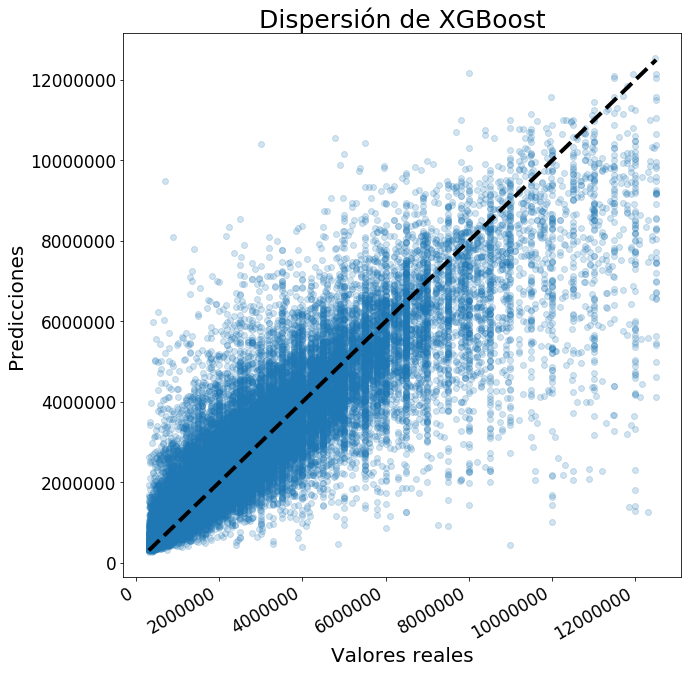

In [0]:
ver_dispersion(y_test, pred, "XGBoost")

In [0]:
desc_train = pd.read_csv("/content/drive/My Drive/descripciones_train_limpias.csv")

In [0]:
desc_train = desc_train.fillna("")

In [0]:
hasher = TfidfVectorizer(max_features=5000, dtype=np.float32)

In [0]:
vectorized_train = hasher.fit_transform(desc for desc in desc_train["descripcion"])

In [0]:
descr = reduce_mem_usage(pd.DataFrame(vectorized_train.todense(), columns=[f"fh{n}" for n in range(5000)]))

In [0]:
train_desc = pd.concat([train_limpio, descr], axis=1)

In [0]:
X, y = train_desc.drop(["precio", "cuantiles"], axis=1),train_desc["precio"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=96969)

In [0]:
reg = XGBRegressor(tree_method='gpu_hist', gpu_id=0, max_depth=15, min_child_weight=0.1, colsample_bytree=0.6, n_estimators=2000, learning_rate=0.07)

In [0]:
%%time
reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3min 47s, sys: 1min 28s, total: 5min 16s
Wall time: 5min 15s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=15, min_child_weight=0.1, missing=None,
             n_estimators=2000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

In [0]:
pred = reg.predict(X_test)

In [0]:
mean_absolute_error(y_test, pred)

508825.38590657554

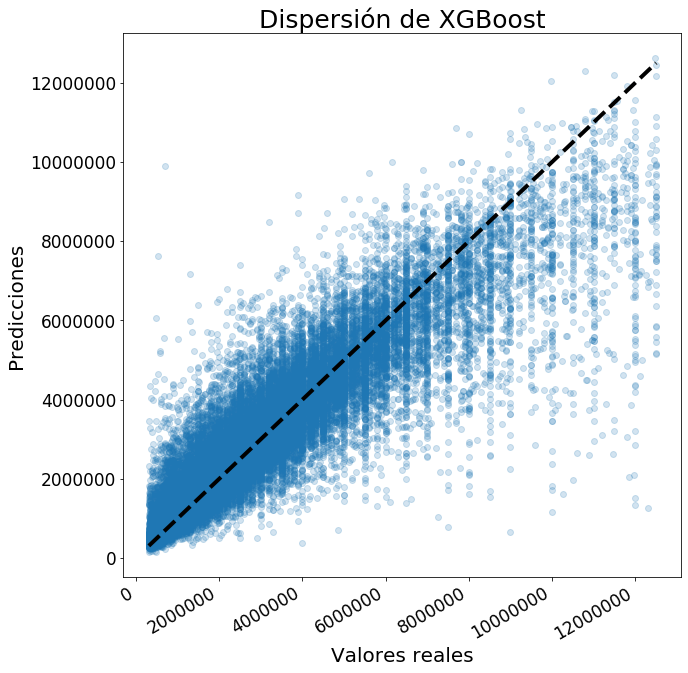

In [0]:
ver_dispersion(y_test, pred, "XGBoost")